In [332]:
import numpy as np
import pandas as pd
import scipy.stats as norm
import seaborn

seaborn.set()

CARS = [
    "ford",
    "bmw",
    "fiat",
    "toyota",
    "peugeot",
    "audi",
    "mercedes",
    "volvo",
    "nissan",
    "suzuki",
    "volkswagen",
    "renault",
    "skoda",
    "opel"
]

In [6]:
from currency_converter import CurrencyConverter

curr = CurrencyConverter()

In [7]:
cars_pl = pd.read_csv("CARS_PL.csv", sep=";")

cars_pl['price'] = cars_pl['price'].str.replace(" ", "").astype(np.float64)
cars_pl['mileage'] = cars_pl['mileage'].str.replace(" ", "").astype(np.float64)

for col_id, row in cars_pl.iterrows():
    pr = row['price']
    euro = curr.convert(pr, 'PLN', "EUR")
    cars_pl.at[col_id, 'euros'] = round(euro, 2)
    
cars_pl.head(5)

,country,model,name,year,mileage,fuel,price,euros
0,PL,ford,Ford Kuga,2018,172890.0,Diesel,67800.0,15828.18
1,PL,ford,Ford Kuga,2010,101000.0,Diesel,34900.0,8147.54
2,PL,ford,Ford Fiesta Mk7,2010,124590.0,Benzyna,16900.0,3945.37
3,PL,ford,Ford Galaxy 2.0,2010,257000.0,Diesel,31500.0,7353.80
4,PL,ford,Ford Kuga 2.0,2009,218000.0,Diesel,36600.0,8544.41


In [8]:
cars_uk = pd.read_csv("CARS_UK.csv",sep=";")
    
cars_uk['price'] = cars_uk['price'].astype(np.float64)
cars_uk['mileage'] = cars_uk['mileage'].str.replace(" ", "").astype(np.float64)

for col_id, row in cars_uk.iterrows():
    pr = row['price']
    euro = curr.convert(pr, 'GBP', "EUR")
    cars_uk.at[col_id, 'euros'] = round(euro, 2)

cars_uk.head(5)

,country,model,name,year,mileage,fuel,price,euros
0,UK,ford,Ford Mondeo 2.0 TDCi 140 Zetec 5 door,2013,83329.0,Diesel,4989.0,5974.13
1,UK,ford,Ford Fiesta 1.25 Zetec 3dr,2005,75000.0,Petrol,850.0,1017.84
2,UK,ford,Ford Focus 1.6 i 16v Ghia 5dr,2002,159000.0,Petrol,200.0,239.49
3,UK,ford,Ford Focus 1.6 TDCi ECOnetic DPF 5dr,2010,129300.0,Diesel,1495.0,1790.20
4,UK,ford,Ford C-Max 1.6 16v Style 5dr,2008,82000.0,Petrol,1490.0,1784.22


In [9]:
cars_us = pd.read_csv("CARS_US.csv", sep=";")

cars_us['price'] = cars_us['price'].astype(np.float64)
cars_us['mileage'] = cars_us['mileage'].astype(np.float64)

for col_id, row in cars_us.iterrows():
    pr = row['price']
    euro = curr.convert(int(pr), 'USD', "EUR")
    cars_us.at[col_id, 'euros'] = round(euro, 2)
    
cars_us.head(5)

,country,model,name,year,mileage,price,euros
0,US,ford,Ford Explorer XLT,2017,34863.0,25089.0,23228.40
1,US,ford,Ford Explorer Platinum,2016,39710.0,29386.0,27206.74
2,US,ford,Ford Taurus Limited,2019,46484.0,19963.0,18482.55
3,US,ford,Ford Explorer XLT,2014,139341.0,12990.0,12026.66
4,US,ford,Ford Taurus Limited,2016,53555.0,17995.0,16660.49


In [34]:
cars_de = pd.read_csv("CARS_DE.csv", sep=";")

cars_de['price'] = cars_de['price'].str.replace(" ", "").astype(np.float64)
cars_de['euros'] = cars_de['price']
cars_de['mileage'] = cars_de['mileage'].astype(np.float64)
    
cars_de.head(5)

,country,model,name,year,mileage,fuel,price,euros
0,DE,ford,Ford Focus 1.6 Ghia*HU/AU bis,2020,231658.0,Petrol,899.0,899.0
1,DE,bmw,BMW 116,2015,99649.0,Diesel,15300.0,15300.0
2,DE,bmw,BMW 420,2016,89322.0,Diesel,20990.0,20990.0
3,DE,bmw,BMW X1,2013,105000.0,Diesel,11890.0,11890.0
4,DE,bmw,BMW 135,2012,153000.0,Gasoline,18500.0,18500.0


In [33]:
cars_nl = pd.read_csv("CARS_NL.csv", sep=";")

cars_nl['price'] = cars_nl['price'].astype(np.float64)
cars_nl['euros'] = cars_nl['price']
cars_nl['mileage'] = cars_nl['mileage'].astype(np.float64)

cars_nl.head(5)

,country,model,name,year,mileage,fuel,price,euros
0,NL,ford,Ford FIESTA FIESTA airco,2000,122967.0,Petrol,850.0,850.0
1,NL,ford,Ford Fiesta 1.3-8V STYLE,2006,141118.0,Petrol,900.0,900.0
2,NL,ford,Ford Transit 300M 2.2 TDCI L2H2 9 SITZ. PERSON...,2011,257841.0,Diesel,4950.0,4950.0
3,NL,ford,Ford fusion 1.4-16v Automaat Airco 1e eigenaar...,2003,90572.0,Petrol,2750.0,2750.0
4,NL,ford,Ford Mondeo 2.0 TDi 16v. Airco,2001,306040.0,Diesel,750.0,750.0


In [114]:
CARS_DATA = [cars_pl, cars_de, cars_uk, cars_us, cars_nl]

In [115]:
cars_mean = []
cars_labels = []

for data in CARS_DATA:
    model_mean = (data.query("model in @CARS")
                .groupby('model', sort=False)['euros']
                .agg(['size', 'mean'])
                .round({'mean':2}))
    ctr = data['country'][0]
    cars_labels.append(str(ctr))
    cars_mean.append(model_mean)

cars_mean[1]['mean']

model
ford            899.00
bmw           16535.80
fiat           9927.07
toyota        11353.95
peugeot       11948.05
volvo         14681.90
nissan        14294.50
suzuki        11224.75
volkswagen     9129.50
renault        8098.38
opel           7800.00
Name: mean, dtype: float64

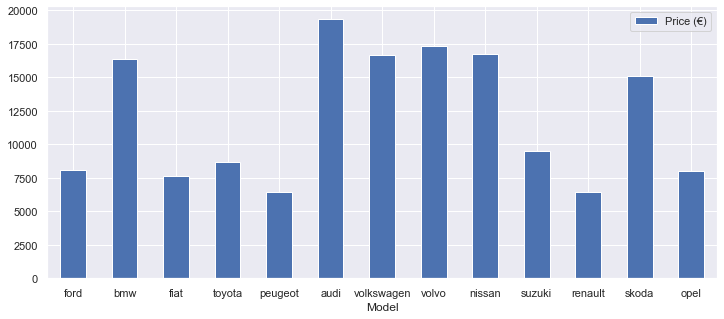

In [13]:
df= pd.DataFrame({'Model':cars_model_mean_pl.index, 'Price (€)':cars_model_mean_pl['mean']})
ax = df.plot(kind="bar", x='Model', y='Price (€)', rot=0, figsize=(12, 5)).margins(10, None)

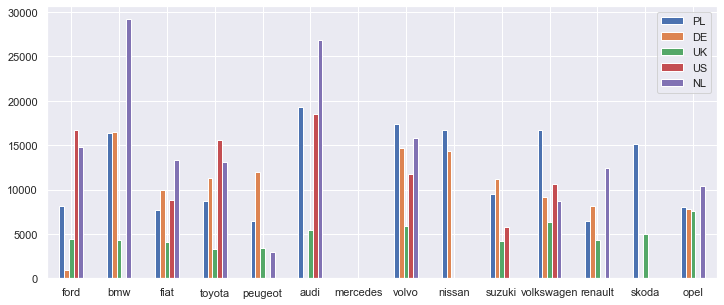

In [113]:
df = pd.DataFrame({cars_labels[0]:cars_mean[0]['mean'],
                       cars_labels[1]:cars_mean[1]['mean'],
                       cars_labels[2]:cars_mean[2]['mean'],
                       cars_labels[3]:cars_mean[3]['mean'],
                       cars_labels[4]:cars_mean[4]['mean']},
                       index=(CARS))
ax = df.plot(kind="bar", rot=0, figsize=(12, 5)).margins(10, None)


In [131]:
cars_year_count = []

for data in CARS_DATA:
    count = (data.groupby('year', sort=True)['model'].agg(['count']))
    cars_year_count.append(count)

cars_year_count[0].sum()

count    423
dtype: int64

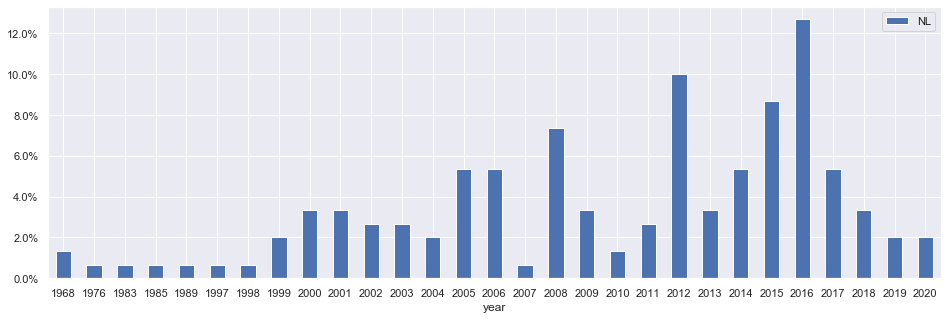

In [140]:
import matplotlib.ticker as mtick

df = pd.DataFrame({cars_labels[4]:cars_year_count[4]['count'].div(cars_year_count[4]['count'].sum())*100},
                     index=(cars_year_count[4].index))
ax = df.plot.bar(rot=0, figsize=(16, 5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

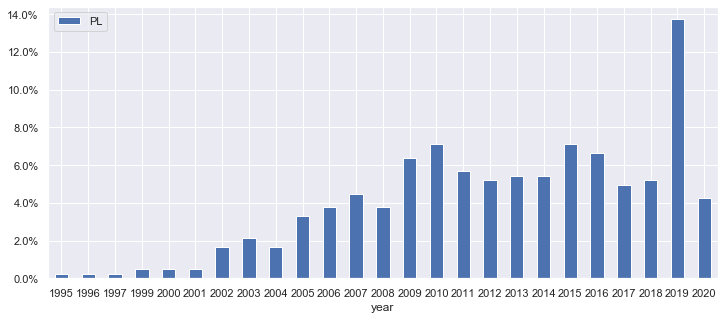

In [136]:
df = pd.DataFrame({cars_labels[0]:cars_year_count[0]['count'].div(cars_year_count[0]['count'].sum())*100},
                     index=(cars_year_count[0].index))
ax = df.plot.bar(rot=0, figsize=(12, 5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

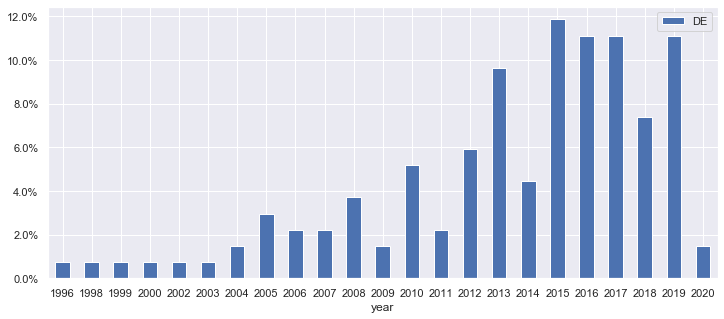

In [135]:
df = pd.DataFrame({cars_labels[1]:cars_year_count[1]['count'].div(cars_year_count[1]['count'].sum())*100},
                     index=(cars_year_count[1].index))
ax = df.plot.bar(rot=0, figsize=(12, 5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

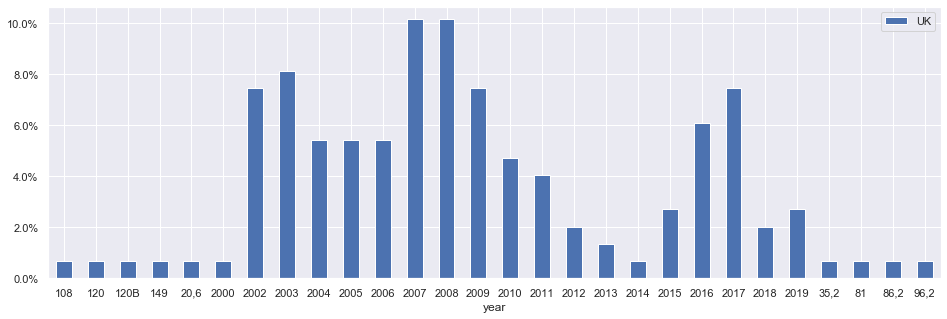

In [137]:
df = pd.DataFrame({cars_labels[2]:cars_year_count[2]['count'].div(cars_year_count[2]['count'].sum())*100},
                     index=(cars_year_count[2].index))
ax = df.plot.bar(rot=0, figsize=(16, 5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

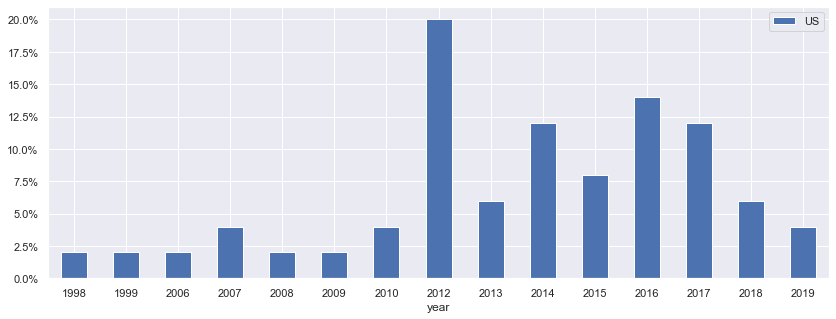

In [138]:
df = pd.DataFrame({cars_labels[3]:cars_year_count[3]['count'].div(cars_year_count[3]['count'].sum())*100},
                     index=(cars_year_count[3].index))
ax = df.plot.bar(rot=0, figsize=(14, 5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [141]:
merged_years = []

for data in cars_year_count:
    for year in data.index:
        if year not in merged_years:
            try:
                year = int(year)
            except: break
            if year > 1900:
                merged_years.append(int(year))
            
merged_years.sort()

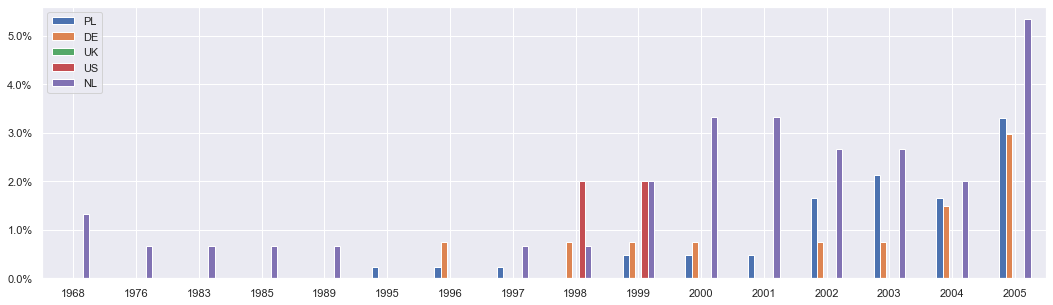

In [160]:
dt_d = []
dt_k = []
for i in range(len(CARS_DATA)):
    d = cars_year_count[i]['count'].div(cars_year_count[i]['count'].sum())*100
    dt_d.append(d)
    dt_k.append(cars_labels[i])
    
# dt_k[0]
    
df = pd.DataFrame({dt_k[0]:dt_d[0],
                   dt_k[1]:dt_d[1],
                   dt_k[2]:dt_d[2],
                   dt_k[3]:dt_d[3],
                   dt_k[4]:dt_d[4]},
                   index=merged_years[:16])
ax = df.plot.bar(rot=0, figsize=(18, 5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

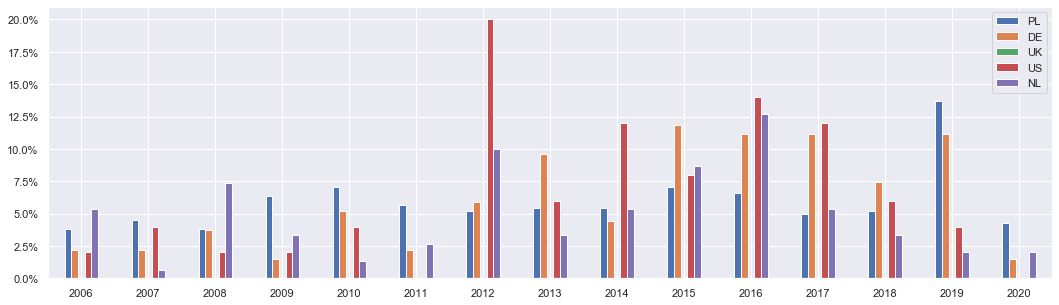

In [161]:
df = pd.DataFrame({dt_k[0]:dt_d[0],
                   dt_k[1]:dt_d[1],
                   dt_k[2]:dt_d[2],
                   dt_k[3]:dt_d[3],
                   dt_k[4]:dt_d[4]},
                   index=merged_years[16:])
ax = df.plot.bar(rot=0, figsize=(18, 5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [265]:
p_c = []
for data in CARS_DATA:
    for i, d in data.iterrows():
        try:
            year = int(d['year'])
        except: break
        price = d['euros']
        model = d['model']
        p_c.append([year, price, CARS.index(model)])

ford 0
bmw 1
fiat 2
toyota 3
peugeot 4
audi 5
mercedes 6
volvo 7
nissan 8
suzuki 9
volkswagen 10
renault 11
skoda 12
opel 13


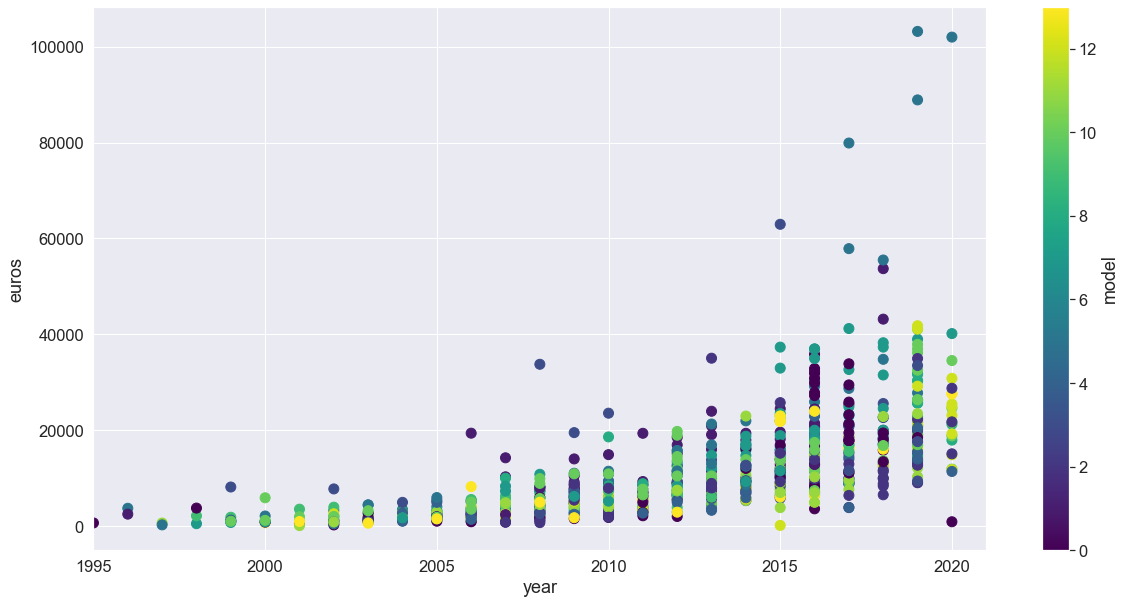

In [338]:
seaborn.set(font_scale=1.5)
c_dict = dict()

for c in CARS:
    i = CARS.index(c)
    c_dict[c] = i

df = pd.DataFrame(p_c, columns=["year", "euros", "model"])
ax = df.plot.scatter(x="year", y="euros", c="model",
                      colormap='viridis', figsize=(20, 10), s=100, sharex=False)
ax.set_xlim(1995, 2021)

for i, y in c_dict.items():
    print(i, y)


In [446]:
tab_means = (cars_pl[['model', 'year', 'euros']])
# tab_means = (cars_pl[['model', 'year', 'euros']]
#              .groupby([cars_pl.model, cars_pl.year, cars_pl.euros])
#              .size().reset_index()
#              .groupby(cars_pl.year))

tab_means = (tab_means.groupby([cars_pl.model, cars_pl.year]).mean()
             .add_suffix('_mean'))
tab_means

year_mean  euros_mean
model year                       
audi  1996       1996   3711.9200
      2000       2000   2101.0900
      2002       2002   3268.1200
      2003       2003   4412.2800
      2004       2004   3455.1200
...               ...         ...
volvo 2016       2016  19971.9875
      2017       2017  36932.4150
      2018       2018  35695.1100
      2019       2019  38986.5800
      2020       2020  40154.0800

[183 rows x 2 columns]

In [475]:
# year_list, euro_list = [], []

# for i, d in tab_means.iterrows():
#     for car in CARS:
#         y_list, e_list = [], []
#         if car in i[0]:
#             y_list.append(d['year_mean'])
#             e_list.append(d['euros_mean'])
#     year_list.append(y_list)
# year_list

In [470]:
audi_y, audi_e = [], []

for i, d in tab_means.iterrows():
    if 'audi' in i[0]:
        audi_y.append(d['year_mean'])
        audi_e.append(d['euros_mean'])


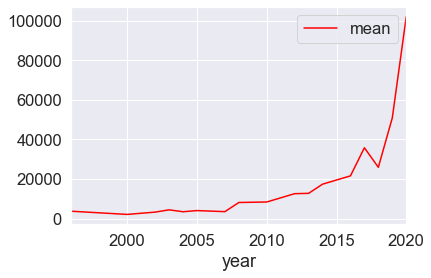

In [471]:
import matplotlib.pyplot as plt

colours = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'black', 'brown', 'yellow', 'gray', 'red', 'red', 'red']

i = 0
df = pd.DataFrame({"year":audi_y, "mean":audi_e})
df.plot(kind="line", x='year', y='mean', color=colours[i])

# df = pd.DataFrame(tab_means, columns=["year", "euros", "model"])
# ax = df.plot.scatter(x="year", y="euros", c="model",
#                       colormap='viridis', figsize=(20, 10), s=100, sharex=False)

In [ ]:
import sklearn
from sklearn import linear_model

linear = linear_model.LinearRegression()
predict = "euros"
X = np.array(p_c)